In [1]:
import pandas as pd

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695


In [3]:
confirmed.shape

(275, 482)

In [4]:
last_date = "5/13/21"
confirmed[last_date]

0       63045
1      131890
2      124889
3       13470
4       29695
        ...  
270      3740
271    303270
272      6507
273     92262
274     38491
Name: 5/13/21, Length: 275, dtype: int64

In [5]:
# valor falso pois o erro é muito grande
# não vou considerar essa análise pois tem muito campo vazio (muita disparidade no padrão)

confirmed['Country/Region'].value_counts()

China                  34
Canada                 16
United Kingdom         12
France                 12
Australia               8
                       ..
Trinidad and Tobago     1
Timor-Leste             1
Russia                  1
Hungary                 1
Togo                    1
Name: Country/Region, Length: 192, dtype: int64

In [6]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,1232,1232,1232,1232,1232,1231,1237,1238,1240,1240
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,3047417,3071496,3095582,3118134,3136158,3147740,3165121,3191097,3215572,3242103
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,217407,217900,218325,218681,219092,219270,219353,219596,219950,220217
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,29865,29884,29893,29906,29922,29931,29938,29946,29955,29957


In [7]:
country = 'China'

In [8]:
confirmed_by_country.loc[country][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
5/9/21     102625.0
5/10/21    102643.0
5/11/21    102660.0
5/12/21    102671.0
5/13/21    102681.0
Name: China, Length: 478, dtype: float64

In [9]:
import matplotlib.pyplot as plt

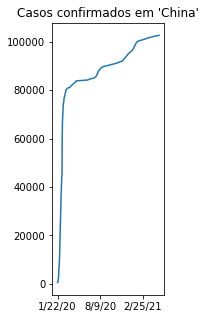

In [10]:
# grafico extremamente apertado, estamos sendo longe do adequado em passar uma mensagem errada

plt.figure(figsize=(2,5))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

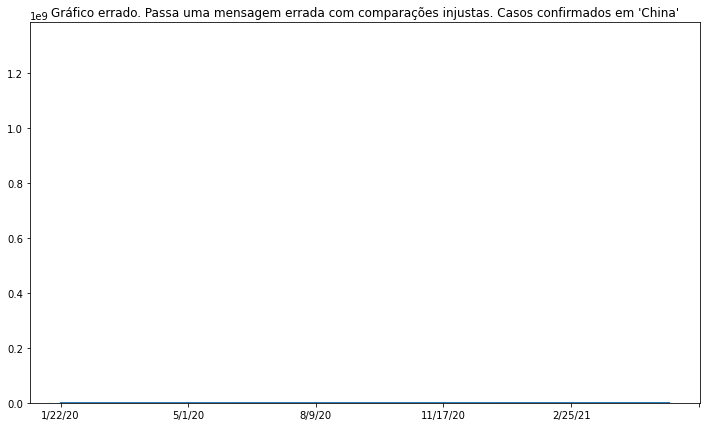

In [11]:
# comparando o momento inicial com 1.386 bi (população da China 2017)

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Gráfico errado. Passa uma mensagem errada com comparações injustas. Casos confirmados em 'China'")
plt.ylim(0, 1386000000)
plt.show()

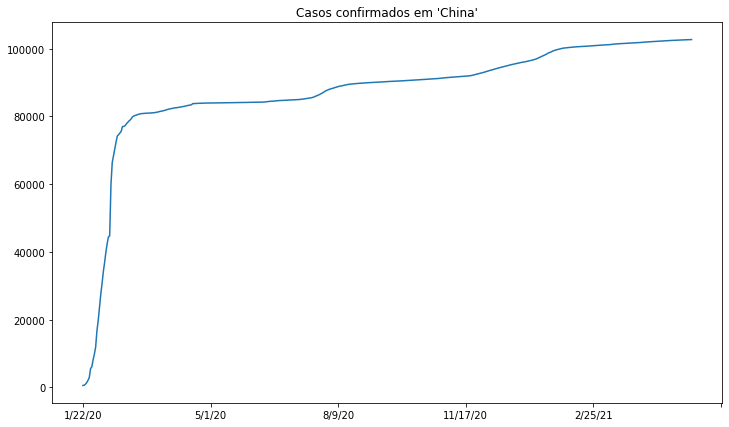

In [12]:
# tentando comparar o crescimento do momento inicial ao momento atual

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

<AxesSubplot:title={'center':'Casos novos confirmados em China'}>

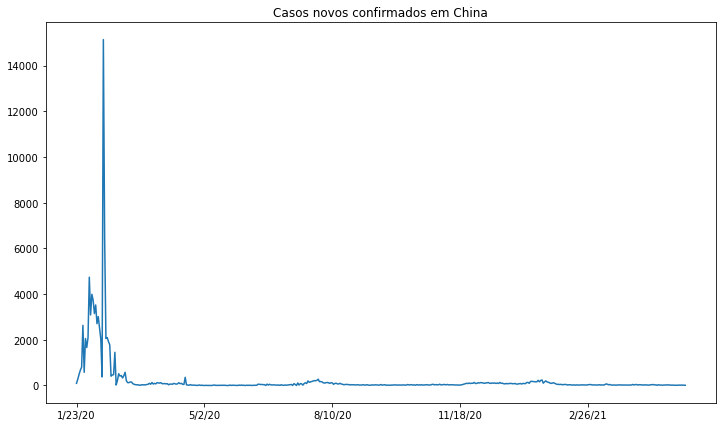

In [13]:
new_cases_country = confirmed_by_country.loc[country][2:].diff().dropna()

plt.figure(figsize=(12,7))
plt.title(f'Casos novos confirmados em {country}')
new_cases_country.plot()

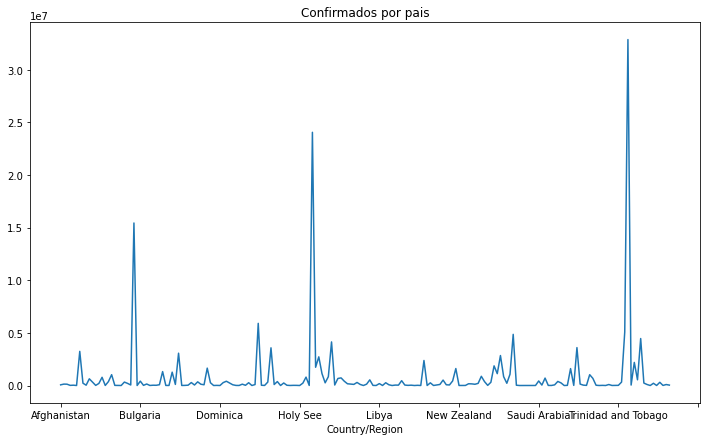

In [14]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por pais')
plt.show()

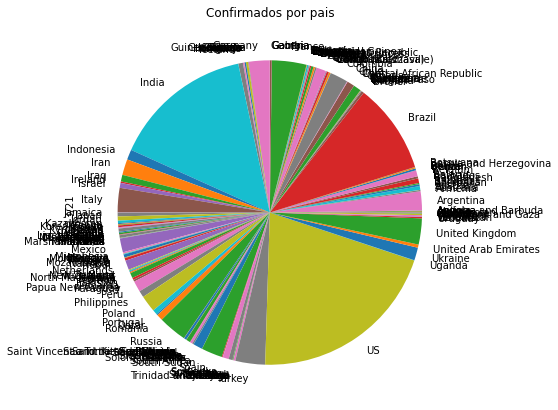

In [15]:
# 99,99% das vezes não devemos usar gráfico de pizza

# 1- Muitas categorias, inviável
# 2- Poucas categorias, a comparação é de área!

plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot(kind='pie')
plt.title('Confirmados por pais')
plt.show()

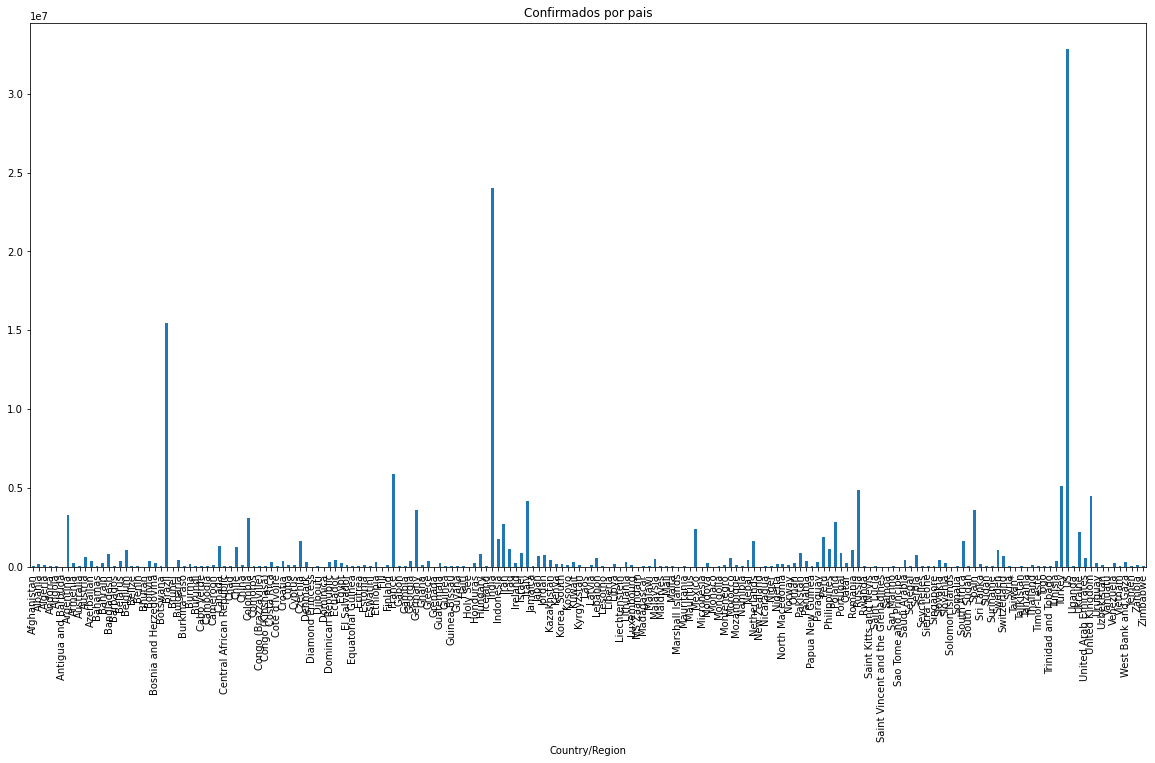

In [16]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

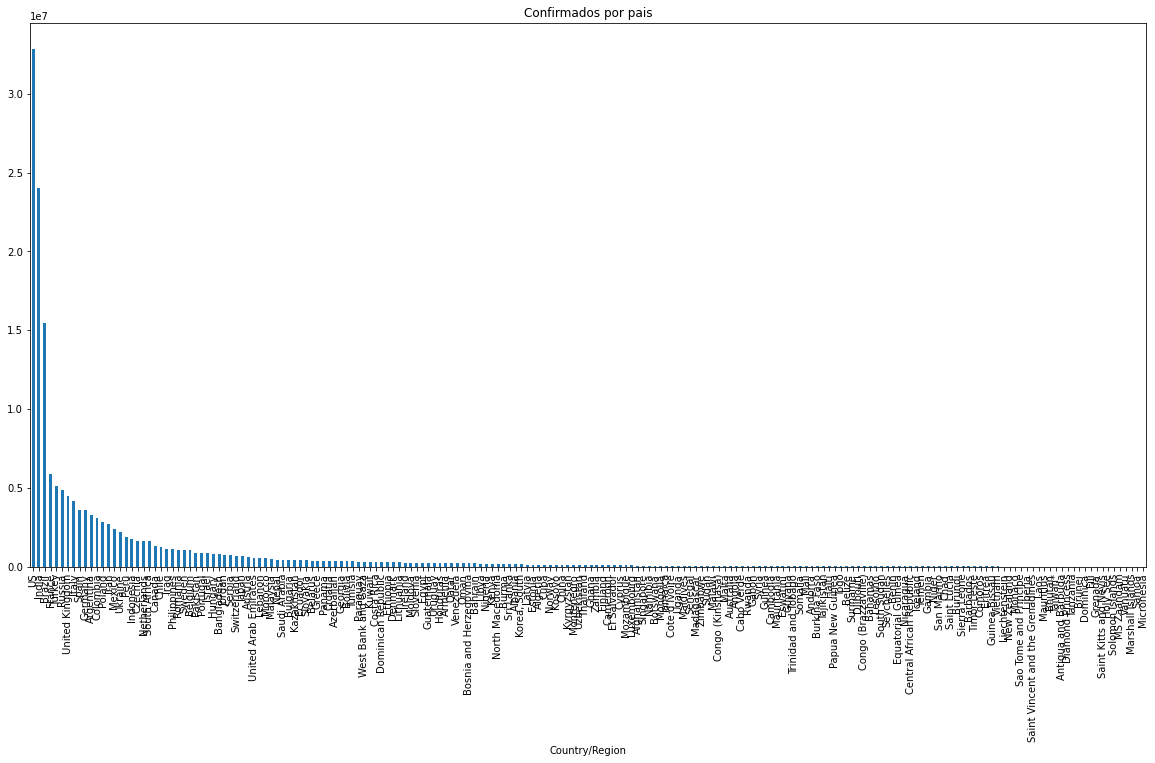

In [17]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

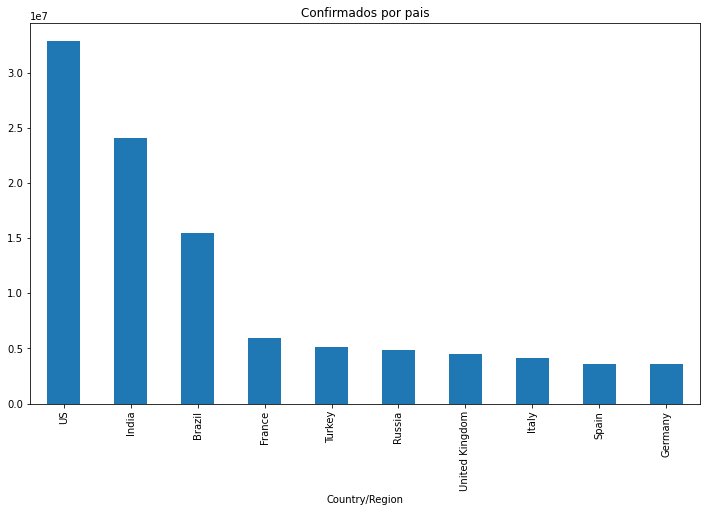

In [18]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

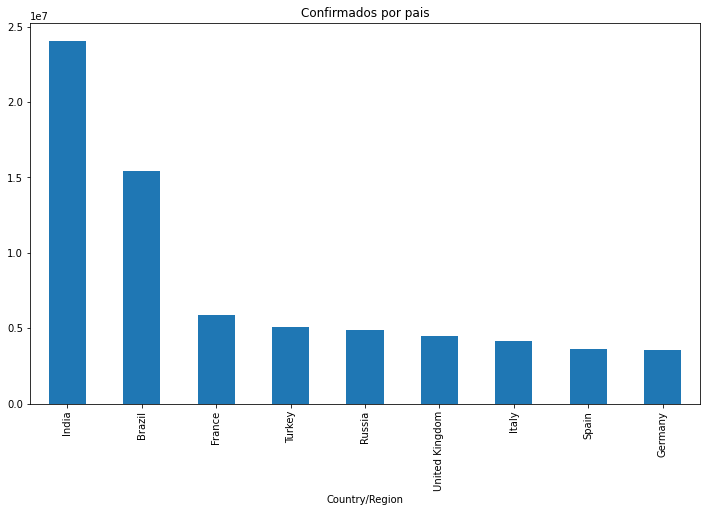

In [19]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

In [20]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2648,2654,2664,2673,2683,2686,2698,2710,2713,2721
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2402,2403,2406,2408,2411,2412,2416,2420,2423,2426
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3289,3299,3307,3315,3321,3328,3335,3343,3350,3355
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,609,618,622,628,630,633,636,639,645,649


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53694,53750,53961,54019,54040,54222,54382,54503,54534,54619
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,112626,113468,114362,115253,116126,117089,118041,119061,120072,121122
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,85693,85869,86007,86149,86280,86420,86554,86703,86857,87003
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12818,12884,12900,12936,12962,12995,13021,13070,13104,13104
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,24190,24492,24503,24698,24713,24717,24772,25145,25187,25629


In [21]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

In [22]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ['Confirmados', 'Mortos', 'Recuperados']
combined

,Confirmados,Mortos,Recuperados
Country/Region,,,
Afghanistan,63045,2721,54619
Albania,131890,2426,121122
Algeria,124889,3355,87003
Andorra,13470,127,13104
Angola,29695,649,25629
...,...,...,...
Vietnam,3740,35,2657
West Bank and Gaza,303270,3401,288891
Yemen,6507,1278,3003


In [23]:
# taxa de letalidade expressa em %
# número de casos letais dentro dos casos que foram letais e não letais

sum_up = combined.sum()
letality_rate_1 = sum_up['Mortos'] / sum_up['Confirmados']
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade é {(letality_rate_1 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade é 2.07%
